<a href="https://colab.research.google.com/github/Namesakenberg/Deep_Learning/blob/main/L2_regularization_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#S
ince the model overfits it has low bias and high variance  , we want to increase the bias , thus using L2 we add bias.

L2 regularization : Ridge :
Is a way to reduce overfitting , in this , we add a penalty term to the loss function , thus the loss function becomes

loss function=original loss+
λ / 2n +
 ∑weights^2

sum(weights^2) is a penalty term which is added to the loss function of the perceptron

this helps in adding bias .

the bias is added to the model as the regularization term , makes the weights rush towards 0 but never become zero.

it rushes towards zero as the loss function is changed , the differentaition of this loss function reduces the weights

thus all the weights are forced to move towards 0 , but to control this the lambda term is used , lambda is a regularizaion parameter


if L1 regularization is used the weights move towards zero even faster and can also become zero

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons

X,y = make_moons(100,noise =0.25, random_state=2)

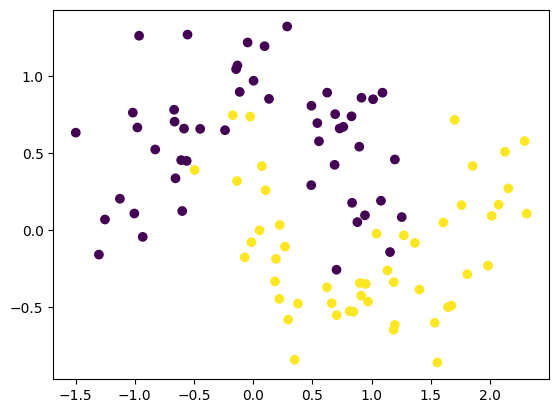

In [ ]:
plt.scatter(X[:,0] , X[:,1] , c=y)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(128 , activation='relu' , input_dim = 2))
model.add(Dense(128 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model .summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.fit(X,y,epochs = 2000 , verbose= 0 , validation_split=0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

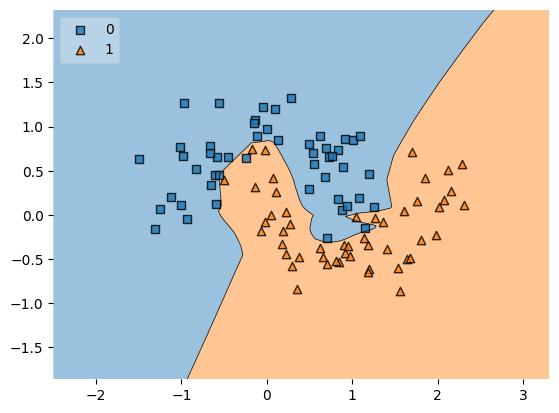

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model, legend = 2)

# using L2 regularization

In [ ]:
from tensorflow.keras.regularizers import l2

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l2(0.03)))
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer = 'Adam' ,loss ='binary_crossentropy' ,metrics=['accuracy'])
model2.fit(X , y, epochs=2000 , verbose = 0 , validation_split = 0.2 )

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

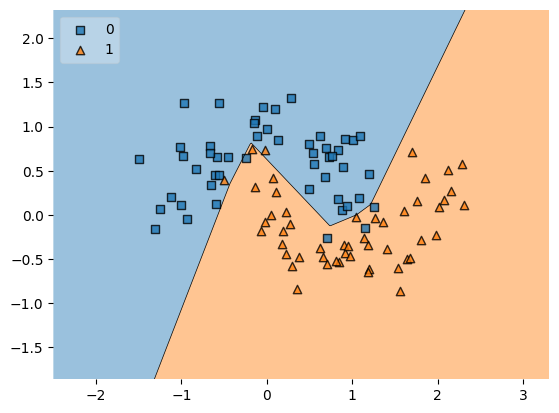

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model2, legend = 2)